In [1]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torchvision.models import resnet50, ResNet50_Weights
from torch.utils.data import DataLoader, Dataset
from tqdm import tqdm
import matplotlib.pyplot as plt
import json
import os

In [2]:
# Set device
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
data_folder_opti = "../data/save_result/same_parameter_real_optimized_function"
data_folder_high = "../data/save_result/same_parameter_real_optimized_function_wd_high"
data_folder_low = "../data/save_result/same_parameter_real_optimized_function_wd_low"
nb_classe = 1000

In [4]:
data_opti = {'loss': torch.tensor(torch.load(f'{data_folder_opti}/loss.pt',map_location=DEVICE)),'moyenne_erreur_classe_model': torch.tensor(torch.load(f'{data_folder_opti}/moyenne_erreur_classe_model.pt',map_location=DEVICE)),'weights_epoch': torch.tensor(torch.load(f'{data_folder_opti}/weights_epoch.pt',map_location=DEVICE))}
data_high = {'loss': torch.tensor(torch.load(f'{data_folder_high}/loss.pt',map_location=DEVICE)),'moyenne_erreur_classe_model': torch.tensor(torch.load(f'{data_folder_high}/moyenne_erreur_classe_model.pt',map_location=DEVICE)),'weights_epoch': torch.tensor(torch.load(f'{data_folder_high}/weights_epoch.pt',map_location=DEVICE))}
data_low = {'loss': torch.tensor(torch.load(f'{data_folder_low}/loss.pt',map_location=DEVICE)),'moyenne_erreur_classe_model': torch.tensor(torch.load(f'{data_folder_low}/moyenne_erreur_classe_model.pt',map_location=DEVICE)),'weights_epoch': torch.tensor(torch.load(f'{data_folder_low}/weights_epoch.pt',map_location=DEVICE))}

In [28]:
t_k = {'opti':[torch.argmin(data_opti['moyenne_erreur_classe_model'][:,l]).item() for l in range(nb_classe)], 'high':[torch.argmin(data_high['moyenne_erreur_classe_model'][:,l]).item() for l in range(nb_classe)],'low':[torch.argmin(data_low['moyenne_erreur_classe_model'][:,l]).item() for l in range(nb_classe)]}
r_k = {'opti':[torch.min(data_opti['moyenne_erreur_classe_model'][:,m]).item() for m in range(nb_classe)],'high':[torch.min(data_high['moyenne_erreur_classe_model'][:,m]).item() for m in range(nb_classe)],'low':[torch.min(data_low['moyenne_erreur_classe_model'][:,m]).item() for m in range(nb_classe)]}
t = {'opti': torch.argmin(data_opti['loss']), 'low': torch.argmin(data_low['loss']), 'high': torch.argmin(data_high['loss'])}
r_t = {'opti': torch.min(data_opti['loss']), 'low': torch.min(data_low['loss']), 'high': torch.min(data_high['loss'])}
decalage = {'opti' : torch.abs(torch.tensor(t_k['opti']) - t['opti']), 'low' : torch.abs(torch.tensor(t_k['low']) - t['low']), 'high' : torch.abs(torch.tensor(t_k['high']) - t['high'])}
regret = {'opti': torch.abs(torch.tensor(r_k['opti']) - r_k['opti'][t['opti']]),'low': torch.abs(torch.tensor(r_k['low']) - r_k['low'][t['low']]),'high': torch.abs(torch.tensor(r_k['high']) - r_k['high'][t['high']])}

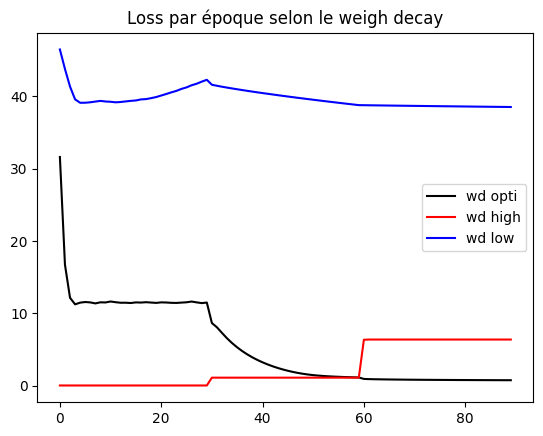

In [13]:
plt.plot(data_opti['loss'],color='black',label='wd opti')
plt.plot(data_high['loss'],color='red',label='wd high')
plt.plot(data_low['loss'],color='blue', label='wd low')
plt.title('Loss par époque selon le weigh decay')
plt.legend()

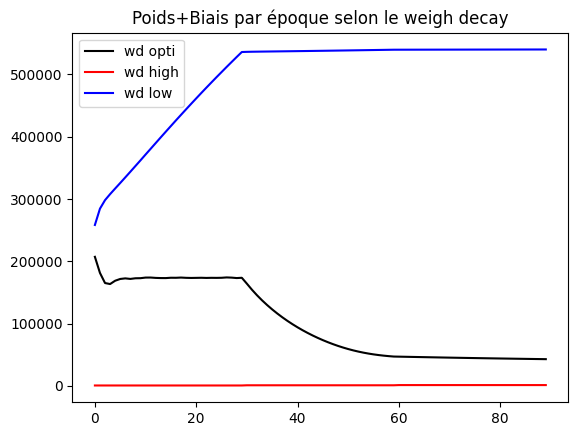

In [31]:
plt.plot(torch.tensor(data_opti['weights_epoch']),color='black',label='wd opti')
plt.plot(torch.tensor(data_high['weights_epoch']),color='red',label='wd high')
plt.plot(torch.tensor(data_low['weights_epoch']),color='blue', label='wd low')
plt.title('|Poids+Biais| par époque selon le weigh decay')
plt.legend()

Text(0.5, 1.0, 'Erreur de chaque classe en moyenne par époque selon le weigh decay optimal')

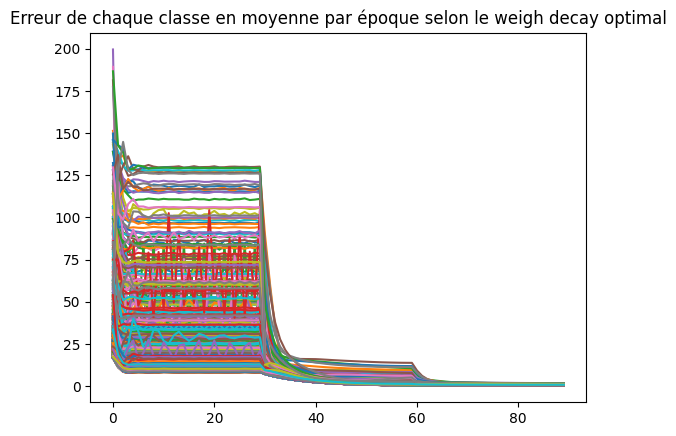

In [34]:
plt.plot(data_opti['loss'],color='black')
for n in range(0,1000):
    plt.plot(data_opti['moyenne_erreur_classe_model'][:,n])
plt.title('Erreur de chaque classe en moyenne par époque selon le weigh decay optimal')

Text(0.5, 1.0, 'Erreur de chaque classe en moyenne par époque selon le weigh decay low')

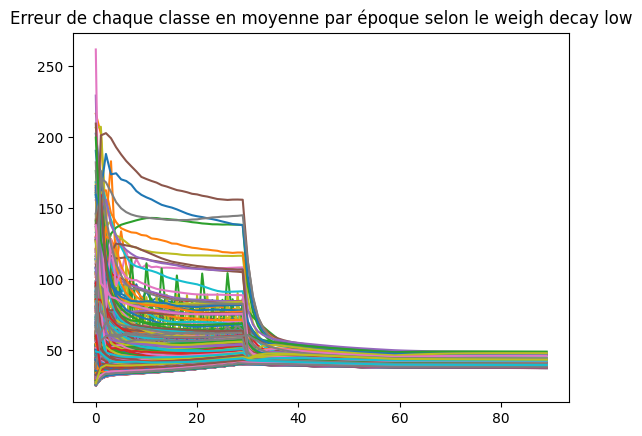

In [35]:
plt.plot(data_low['loss'],color='black')
for n in range(0,1000):
    plt.plot(data_low['moyenne_erreur_classe_model'][:,n])
plt.title('Erreur de chaque classe en moyenne par époque selon le weigh decay low')

Text(0.5, 1.0, 'Erreur de chaque classe en moyenne par époque selon le weigh decay high')

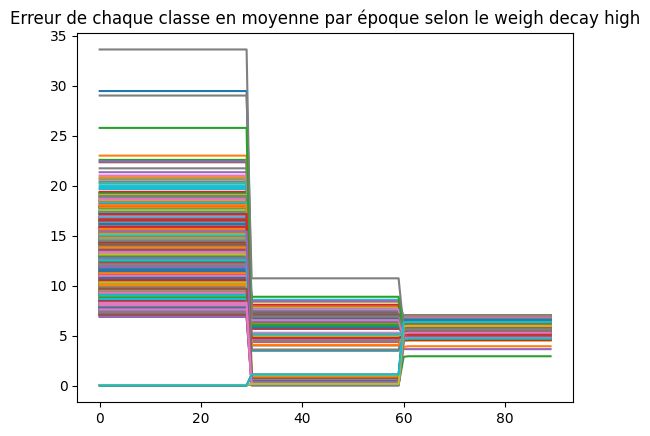

In [36]:
plt.plot(data_high['loss'],color='black')
for n in range(0,1000):
    plt.plot(data_high['moyenne_erreur_classe_model'][:,n])
plt.title('Erreur de chaque classe en moyenne par époque selon le weigh decay high')